In [27]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import linear_model

In [28]:
with open('information.json') as data_file:    
    data = json.load(data_file)
    
print data['posts'][0].keys()

[u'img', u'likes', u'comments', u'tags']


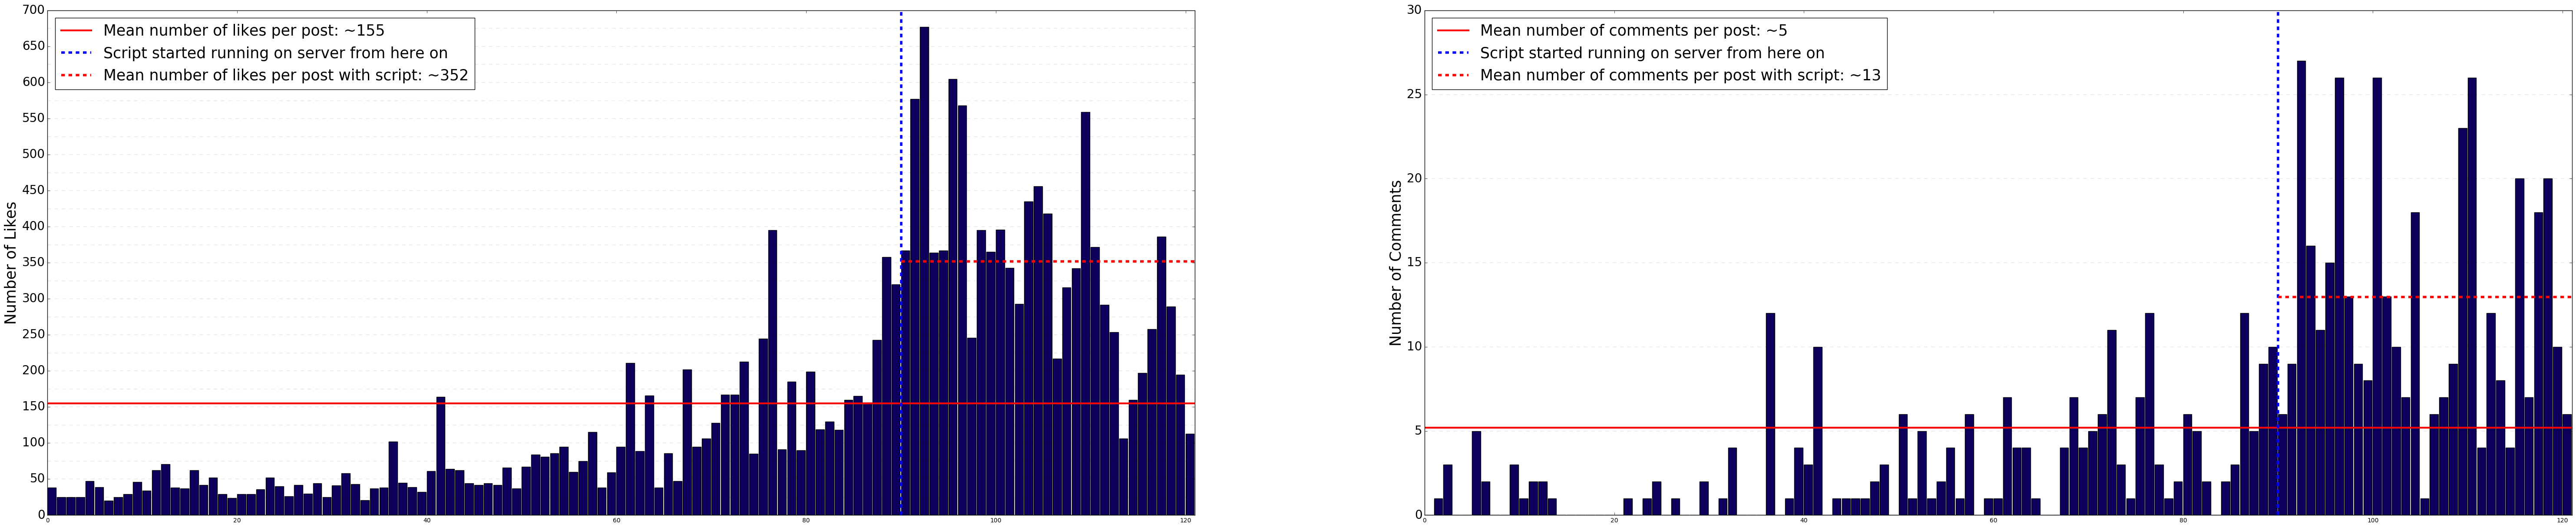

In [29]:
##################################################################################################################
#Likes per post for all posts
##################################################################################################################
likes = [post['likes'] for post in data['posts']]
likes.reverse()
index = np.arange(len(likes))

mean_likes = np.mean(likes)
mean_line = np.empty(len(likes) + 1)
mean_line.fill(mean_likes)

fig = plt.figure(figsize=(75, 15))
ax = fig.add_subplot(121)

ax.bar(index, likes, 0.9, color="#0c005c")
ax.plot(np.arange(len(index) + 1), mean_line, 'r-', linewidth="3", label="Mean number of likes per post: ~" + str(int(round(mean_likes))))

# print only horizontal lines
upperbound = max(likes)
upperbound -= max(likes) % -100

for num in np.arange(0, upperbound + 1, 25):
    line = np.empty(len(likes) + 1)
    line.fill(num)
    
    ax.plot(np.arange(len(index) + 1), line, 'k--', linewidth='0.1')

#plot vertical seperation
ax.plot([90, 90], [0, upperbound], 'b--', linewidth="4", label="Script started running on server from here on")
    
#mean number of likes since script
script_likes = likes[91:]
script_mean = np.mean(script_likes)

script_mean_line = np.empty(len(script_likes) + 2)
script_mean_line.fill(script_mean)

ax.plot(np.arange(len(script_likes) + 2) + 90, script_mean_line, 'r--', linewidth="4", label="Mean number of likes per post with script: ~" + str(int(round(script_mean))))

# restrict the x axis to remove blank space
plt.xlim(0, len(index))
ax.set_ylabel('Number of Likes', fontsize=25)
ax.set_yticks(np.arange(0, max(likes) + 50, 50))
ax.set_yticklabels(np.arange(0, max(likes) + 50, 50), fontsize=20)

plt.legend(loc=2,numpoints=1, fontsize=25)

##################################################################################################################
#Comments per post for all posts
##################################################################################################################
comments = [post['comments'] for post in data['posts']]
comments.reverse()
index = np.arange(len(comments))

mean_comments = np.mean(comments)
mean_line = np.empty(len(comments) + 1)
mean_line.fill(mean_comments)

ax = fig.add_subplot(122)

ax.bar(index, comments, 0.9, color="#0c005c")
ax.plot(np.arange(len(index) + 1), mean_line, 'r-', linewidth="3", label="Mean number of comments per post: ~" + str(int(round(mean_comments))))

# print only horizontal lines
upperbound = max(comments)
upperbound -= max(comments) % -10

for num in np.arange(0, upperbound + 1, 5):
    line = np.empty(len(comments) + 1)
    line.fill(num)
    
    ax.plot(np.arange(len(index) + 1), line, 'k--', linewidth='0.1')

#plot vertical seperation
ax.plot([90, 90], [0, upperbound], 'b--', linewidth="4", label="Script started running on server from here on")
    
#mean number of comments since script
script_comments = comments[91:]
script_mean = np.mean(script_comments)

script_mean_line = np.empty(len(script_comments) + 2)
script_mean_line.fill(script_mean)

ax.plot(np.arange(len(script_comments) + 2) + 90, script_mean_line, 'r--', linewidth="4", label="Mean number of comments per post with script: ~" + str(int(round(script_mean))))

# restrict the x axis to remove blank space
plt.xlim(0, len(index))
ax.set_ylabel('Number of Comments', fontsize=25)
ax.set_yticks(np.arange(0, max(comments) + 5, 5))
ax.set_yticklabels(np.arange(0, max(comments) + 5, 5), fontsize=20)

plt.legend(loc=2,numpoints=1, fontsize=25)
plt.show()

In [31]:
##################################################################################################################
#Tag word cloud
##################################################################################################################

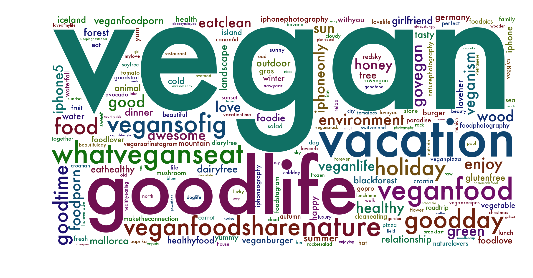

In [32]:
import random
from wordcloud import WordCloud

def new_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(%d, 75%%, 25%%)" % (random.randint(0, 360))

tags = sum([post['tags'] for post in data['posts']], [])
text = ' '.join(tags)
wordcloud = WordCloud(font_path='/Library/Fonts/Futura.ttc',
                      relative_scaling = 0.1,
                      margin=5,
                      background_color="white",
                      width=2048,
                      height=1024
                      ).generate(text)

plt.imshow(wordcloud.recolor(color_func=new_color_func, random_state=3))
wordcloud.to_file("article_img/tags.png")
plt.axis("off")
plt.show()

In [141]:
##################################################################################################################
#Number of received likes per tag (normalized only posts from the day the script started + 12 posts before)
##################################################################################################################
likes_for_tags = {}
tags = sum([post['tags'] for post in data['posts'][:-79]], [])

tags_and_likes = [(post['tags'], post['likes']) for post in data['posts'][:-79]]
for tag in set(tags):
    for tup in tags_and_likes:
        if tag in tup[0]:
            likes_for_tags[tag] = likes_for_tags.get(tag, 0) + tup[1]
            
likes_for_tags = { tag: (likes_for_tags.get(tag) / tags.count(tag)) for tag in likes_for_tags.keys() if tags.count(tag) > 5}

In [145]:
likes_list = sorted(likes_for_tags, key=lambda x: likes_for_tags.get(x))
likes_list.reverse()
likes_list = [(tag, likes_for_tags.get(tag)) for tag in likes_list[:25]]

likes_list = [likes_list[0]] + [tup for tup in likes_list if 'vegan' not in tup[0] and 'food' not in tup[0]]
likes_list

[(u'#veganfood', 404),
 (u'#tasty', 390),
 (u'#yum', 362),
 (u'#yummy', 362),
 (u'#awesome', 354),
 (u'#iphonephotography', 330),
 (u'#goodlife', 321),
 (u'#enjoy', 317),
 (u'#good', 306),
 (u'#goodtimes', 304),
 (u'#goodday', 304),
 (u'#forest', 294)]

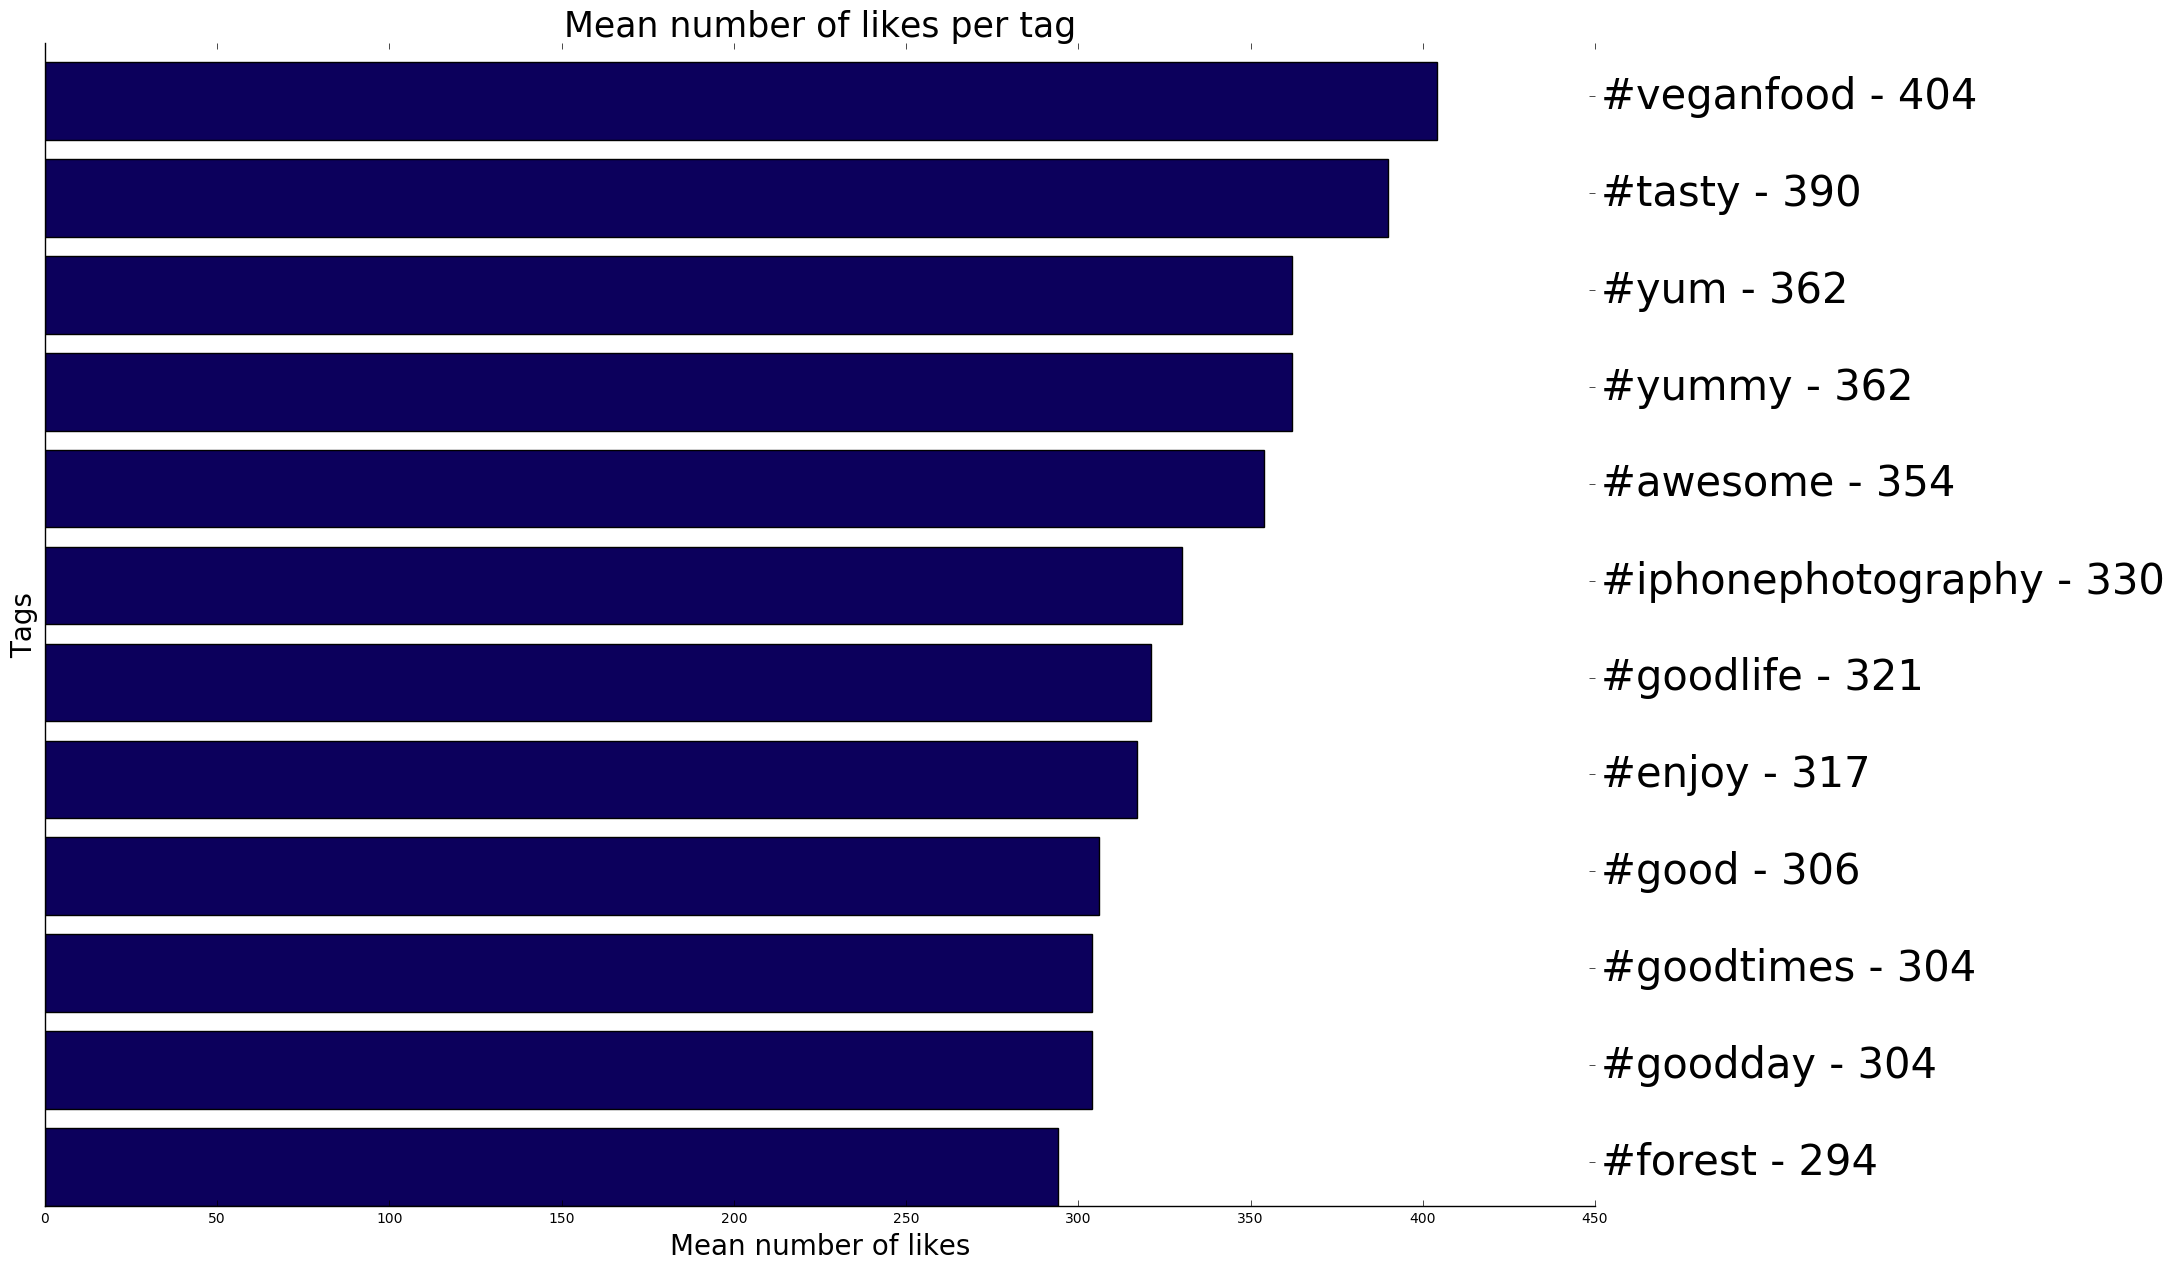

In [147]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)

plt.title('Mean number of likes per tag', fontsize=25)

tags = [tup[0] + ' - ' + str(tup[1]) for tup in likes_list]
likes = [tup[1] for tup in likes_list]
tags.reverse()
likes.reverse()

ax.barh(np.arange(len(tags)), likes, color="#0c005c")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('right')  
ax.set_yticks(np.arange(len(tags)) + 0.45)
ax.set_yticklabels(tags, rotation='horizontal', fontsize=30)
ax.set_ylabel('Tags', fontsize=20)
ax.set_xlabel('Mean number of likes', fontsize=20)

plt.show()

In [34]:
##################################################################################################################
#Working with the follower numbers
##################################################################################################################

In [35]:
def extractInfo(line):
    """Extracts information from line which is in format
    -> Data Time #follower 'followers'"""
    parts = line.split(' ')
    date = ' '.join(parts[:2])
    followerNum = parts[2]
    
    return (date, followerNum)

In [36]:
# contains information in format (date, followerNum)
information = []

with open('./followerNum.txt') as follFile:
    for line in follFile:
        information.append(extractInfo(line))
        
dates = [info[0] for info in information]
followerNum = [int(info[1].replace(',', '')) for info in information]

In [161]:
day_follower_dict = defaultdict(lambda: 0)

for date, follNum in zip(dates, followerNum):
    day = date.split(' ')[0]
    day_follower_dict[day] = follNum
    
day_followers = [pair for pair in day_follower_dict.items()]
day_followers.sort(key=lambda x: x[0])

days = [pair[0] for pair in day_followers]
followers = [pair[1] for pair in day_followers]

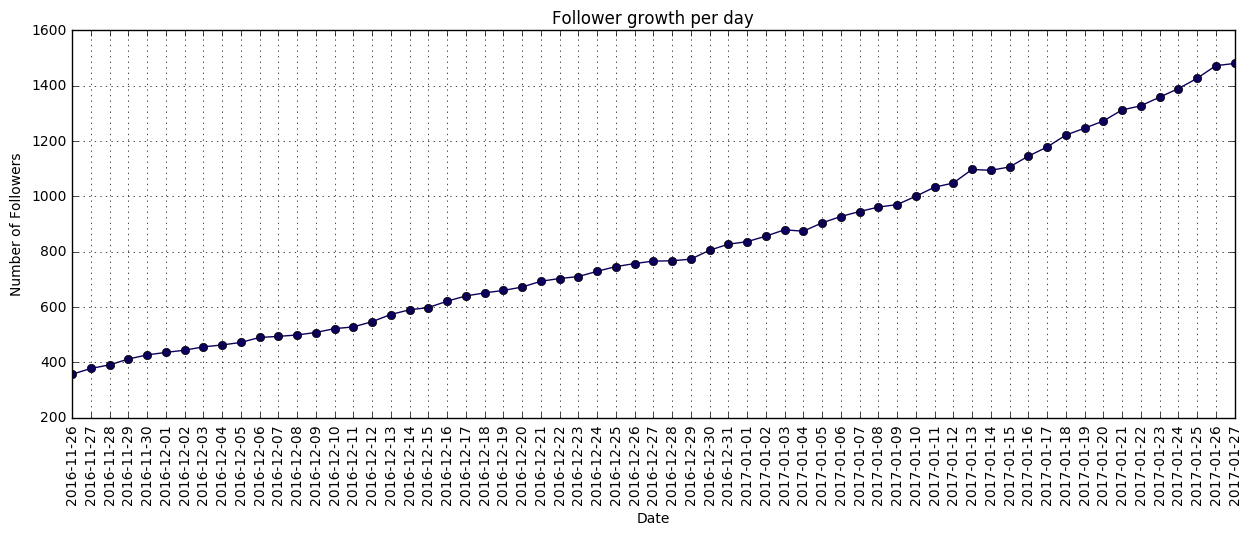

In [162]:
plt.figure(figsize=(15, 5))
plt.title('Follower growth per day')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Followers', fontsize=10)
plt.grid(True)

plt.plot(range(len(days)), followers, marker='o', color="#0c005c")
plt.xticks(range(len(days)), days, rotation='vertical')

plt.xlim(0, len(days) - 1)

plt.show()

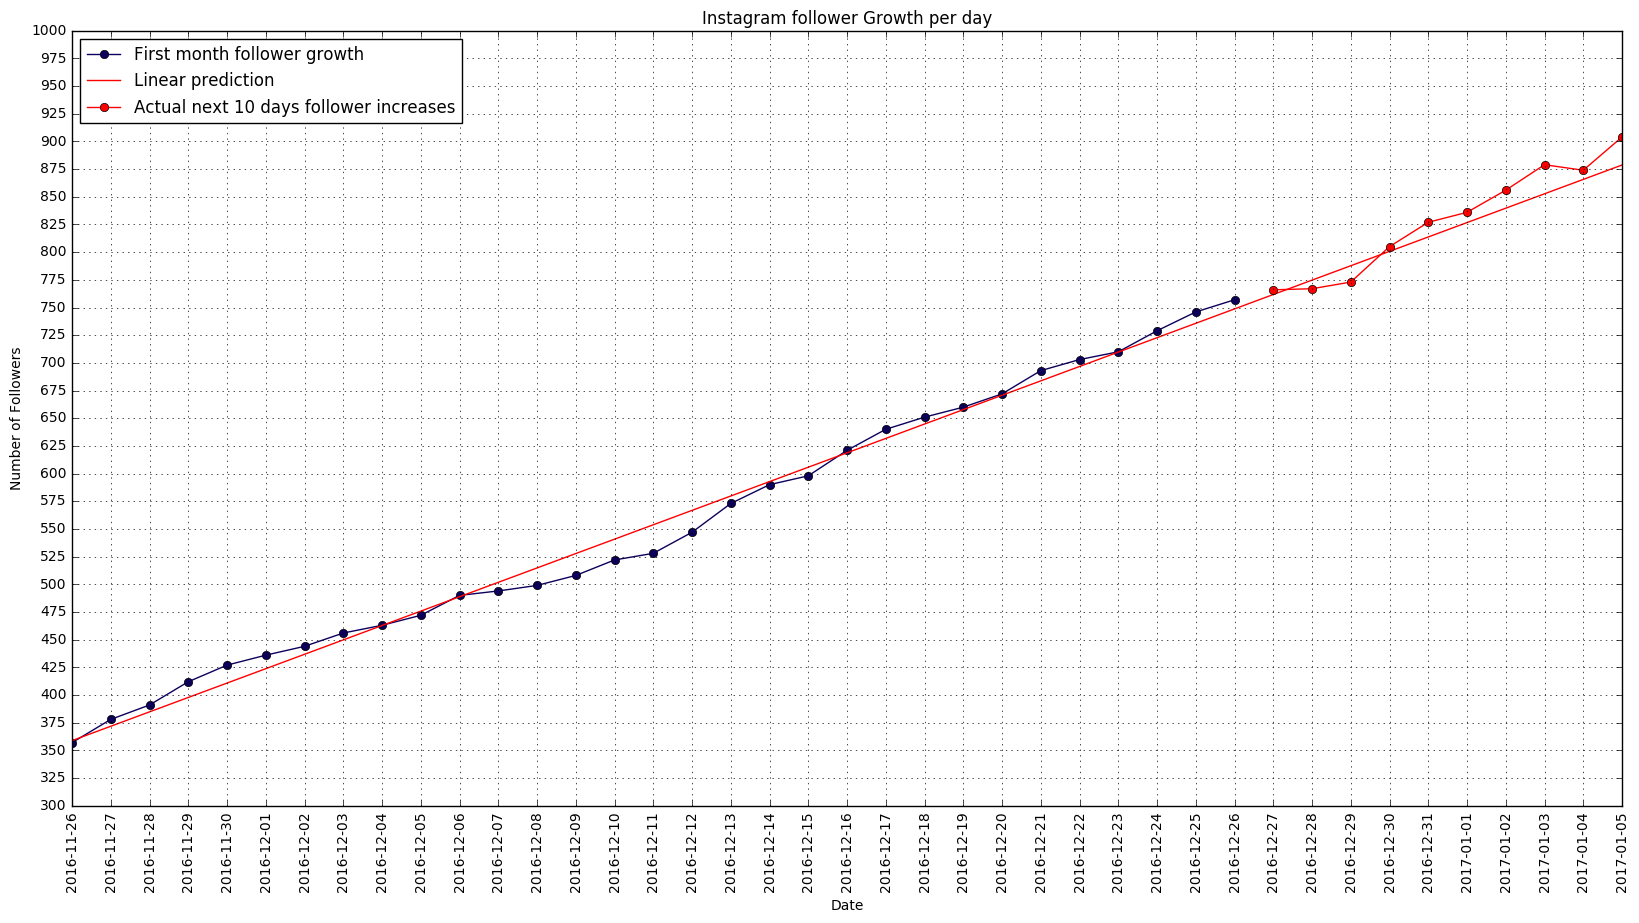

In [163]:
##################################################################################################################
#First month growth and linear regression to predict 10 next days
##################################################################################################################
f_m_days = days[:31]
f_m_followers = followers[:31]

plt.figure(figsize=(20, 10))
plt.title('Instagram follower Growth per day')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Followers', fontsize=10)

plt.plot(range(len(f_m_days)), f_m_followers, marker='o', color="#0c005c", label='First month follower growth')

#Linear Regression
features=np.transpose(np.atleast_2d(np.arange(len(f_m_days))))
targets = f_m_followers

regressor=linear_model.LinearRegression()
regressor.fit(features,targets)

features_w_future = np.transpose(np.atleast_2d(np.arange(len(f_m_days) + 10)))

linearpred=regressor.predict(features_w_future)
plt.plot(features_w_future,linearpred,'r',label='Linear prediction')

#actual 10 next follower nums
future_days =days[31:41]
future_follower = followers[31:41]

plt.plot(np.arange(31,41), future_follower, marker='o', color='red', label='Actual next 10 days follower increases')
plt.xticks(range(len(days[:41])), days[:41], rotation='vertical')
plt.yticks(range(300, 1001, 25), range(300, 1001, 25))

plt.grid(True)
plt.legend(loc=2,numpoints=1)
plt.show()

In [164]:
start_val = features[-1][0]

table = pd.DataFrame()

table['Predicted'] = [int(round(regressor.predict(start_val + i)[0])) for i in range(1, 11)]
table['Actual'] = [followers[start_val + i] for i in range(1, 11)]

table

,Predicted,Actual
0,762,766
1,775,767
2,788,773
3,801,805
4,814,827
5,827,836
6,840,856
7,853,879
8,866,874
9,879,904


In [165]:
##################################################################################################################
#Second month growth and linear comparisson of growth
##################################################################################################################

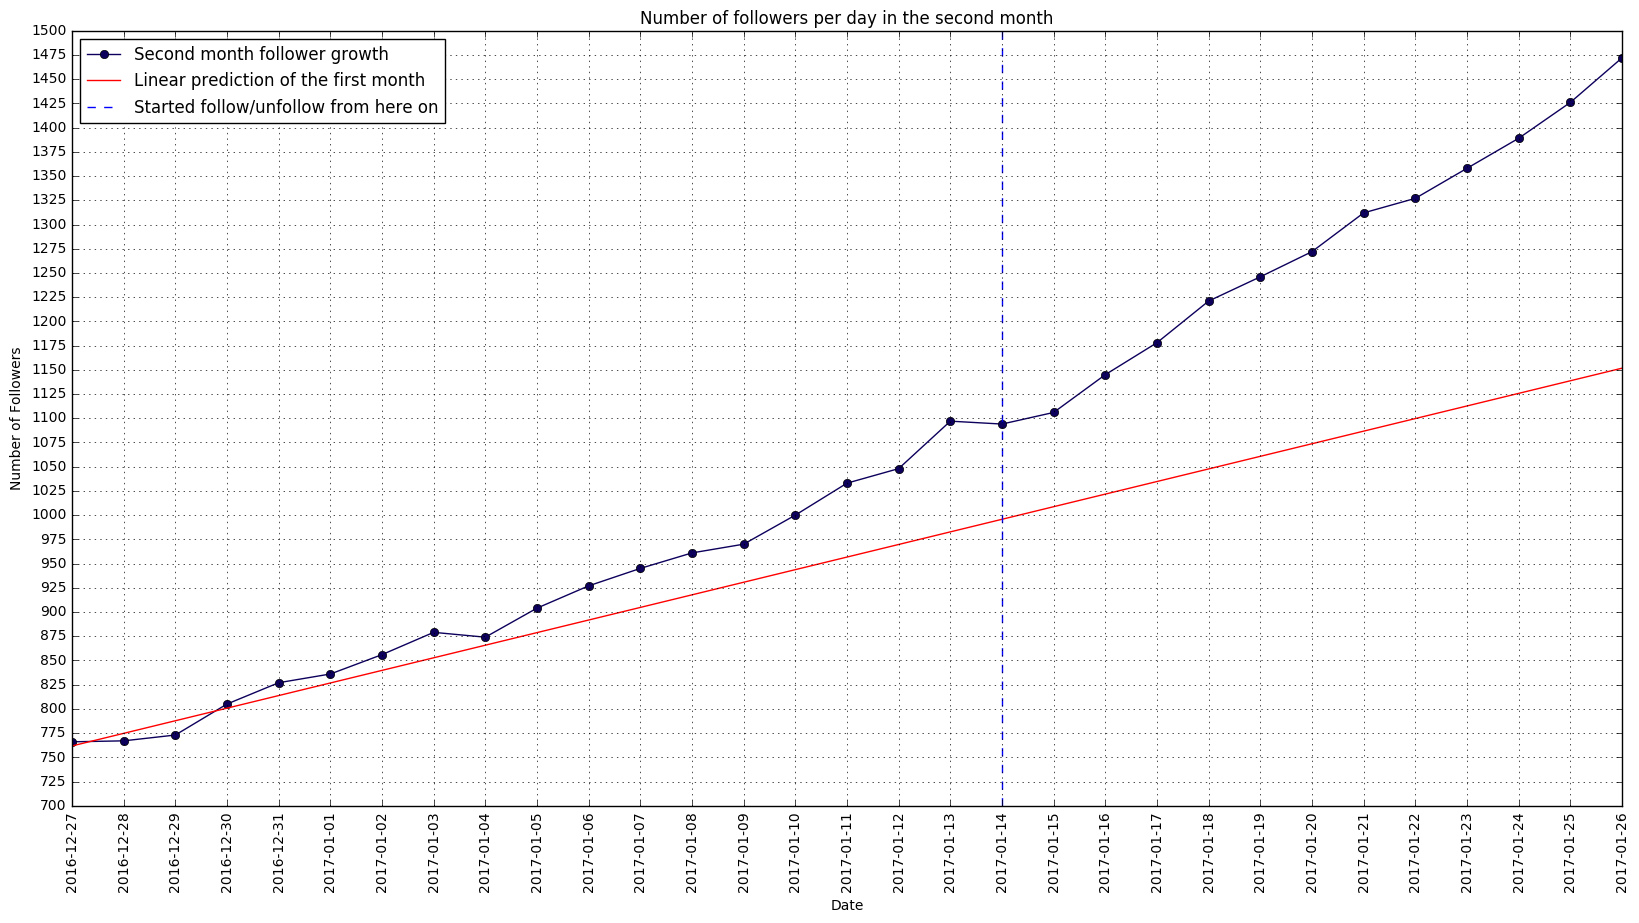

In [219]:
s_m_days = days[31:62]
s_m_followers = followers[31:62]

plt.figure(figsize=(20, 10))
plt.title('Number of followers per day in the second month')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Followers', fontsize=10)

plt.plot(range(len(s_m_days)), s_m_followers, marker='o', color="#0c005c", label='Second month follower growth')

features_w_future = np.transpose(np.atleast_2d(np.arange(len(f_m_days), len(f_m_days) + 31)))

linearpred=regressor.predict(features_w_future)
plt.plot(range(len(features_w_future)),linearpred,'r',label='Linear prediction of the first month')

plt.axvline(18, color='b', linestyle='dashed', label='Started follow/unfollow from here on')

#get the lowerbound "rounded down to 100"
lowerbound = int(s_m_followers[0])
lowerbound -= int(s_m_followers[0]) % 100

#get the upperbound "rounded up to 100"
upperbound = int(s_m_followers[-1])
upperbound -= int(s_m_followers[-1]) % -100

plt.xticks(range(len(s_m_days)), s_m_days, rotation='vertical')
plt.yticks(range(lowerbound, upperbound + 1, 25), range(lowerbound, upperbound + 1, 25))

plt.xlim(0, len(s_m_days) - 1)

plt.grid(True)
plt.legend(loc=2,numpoints=1)
plt.show()

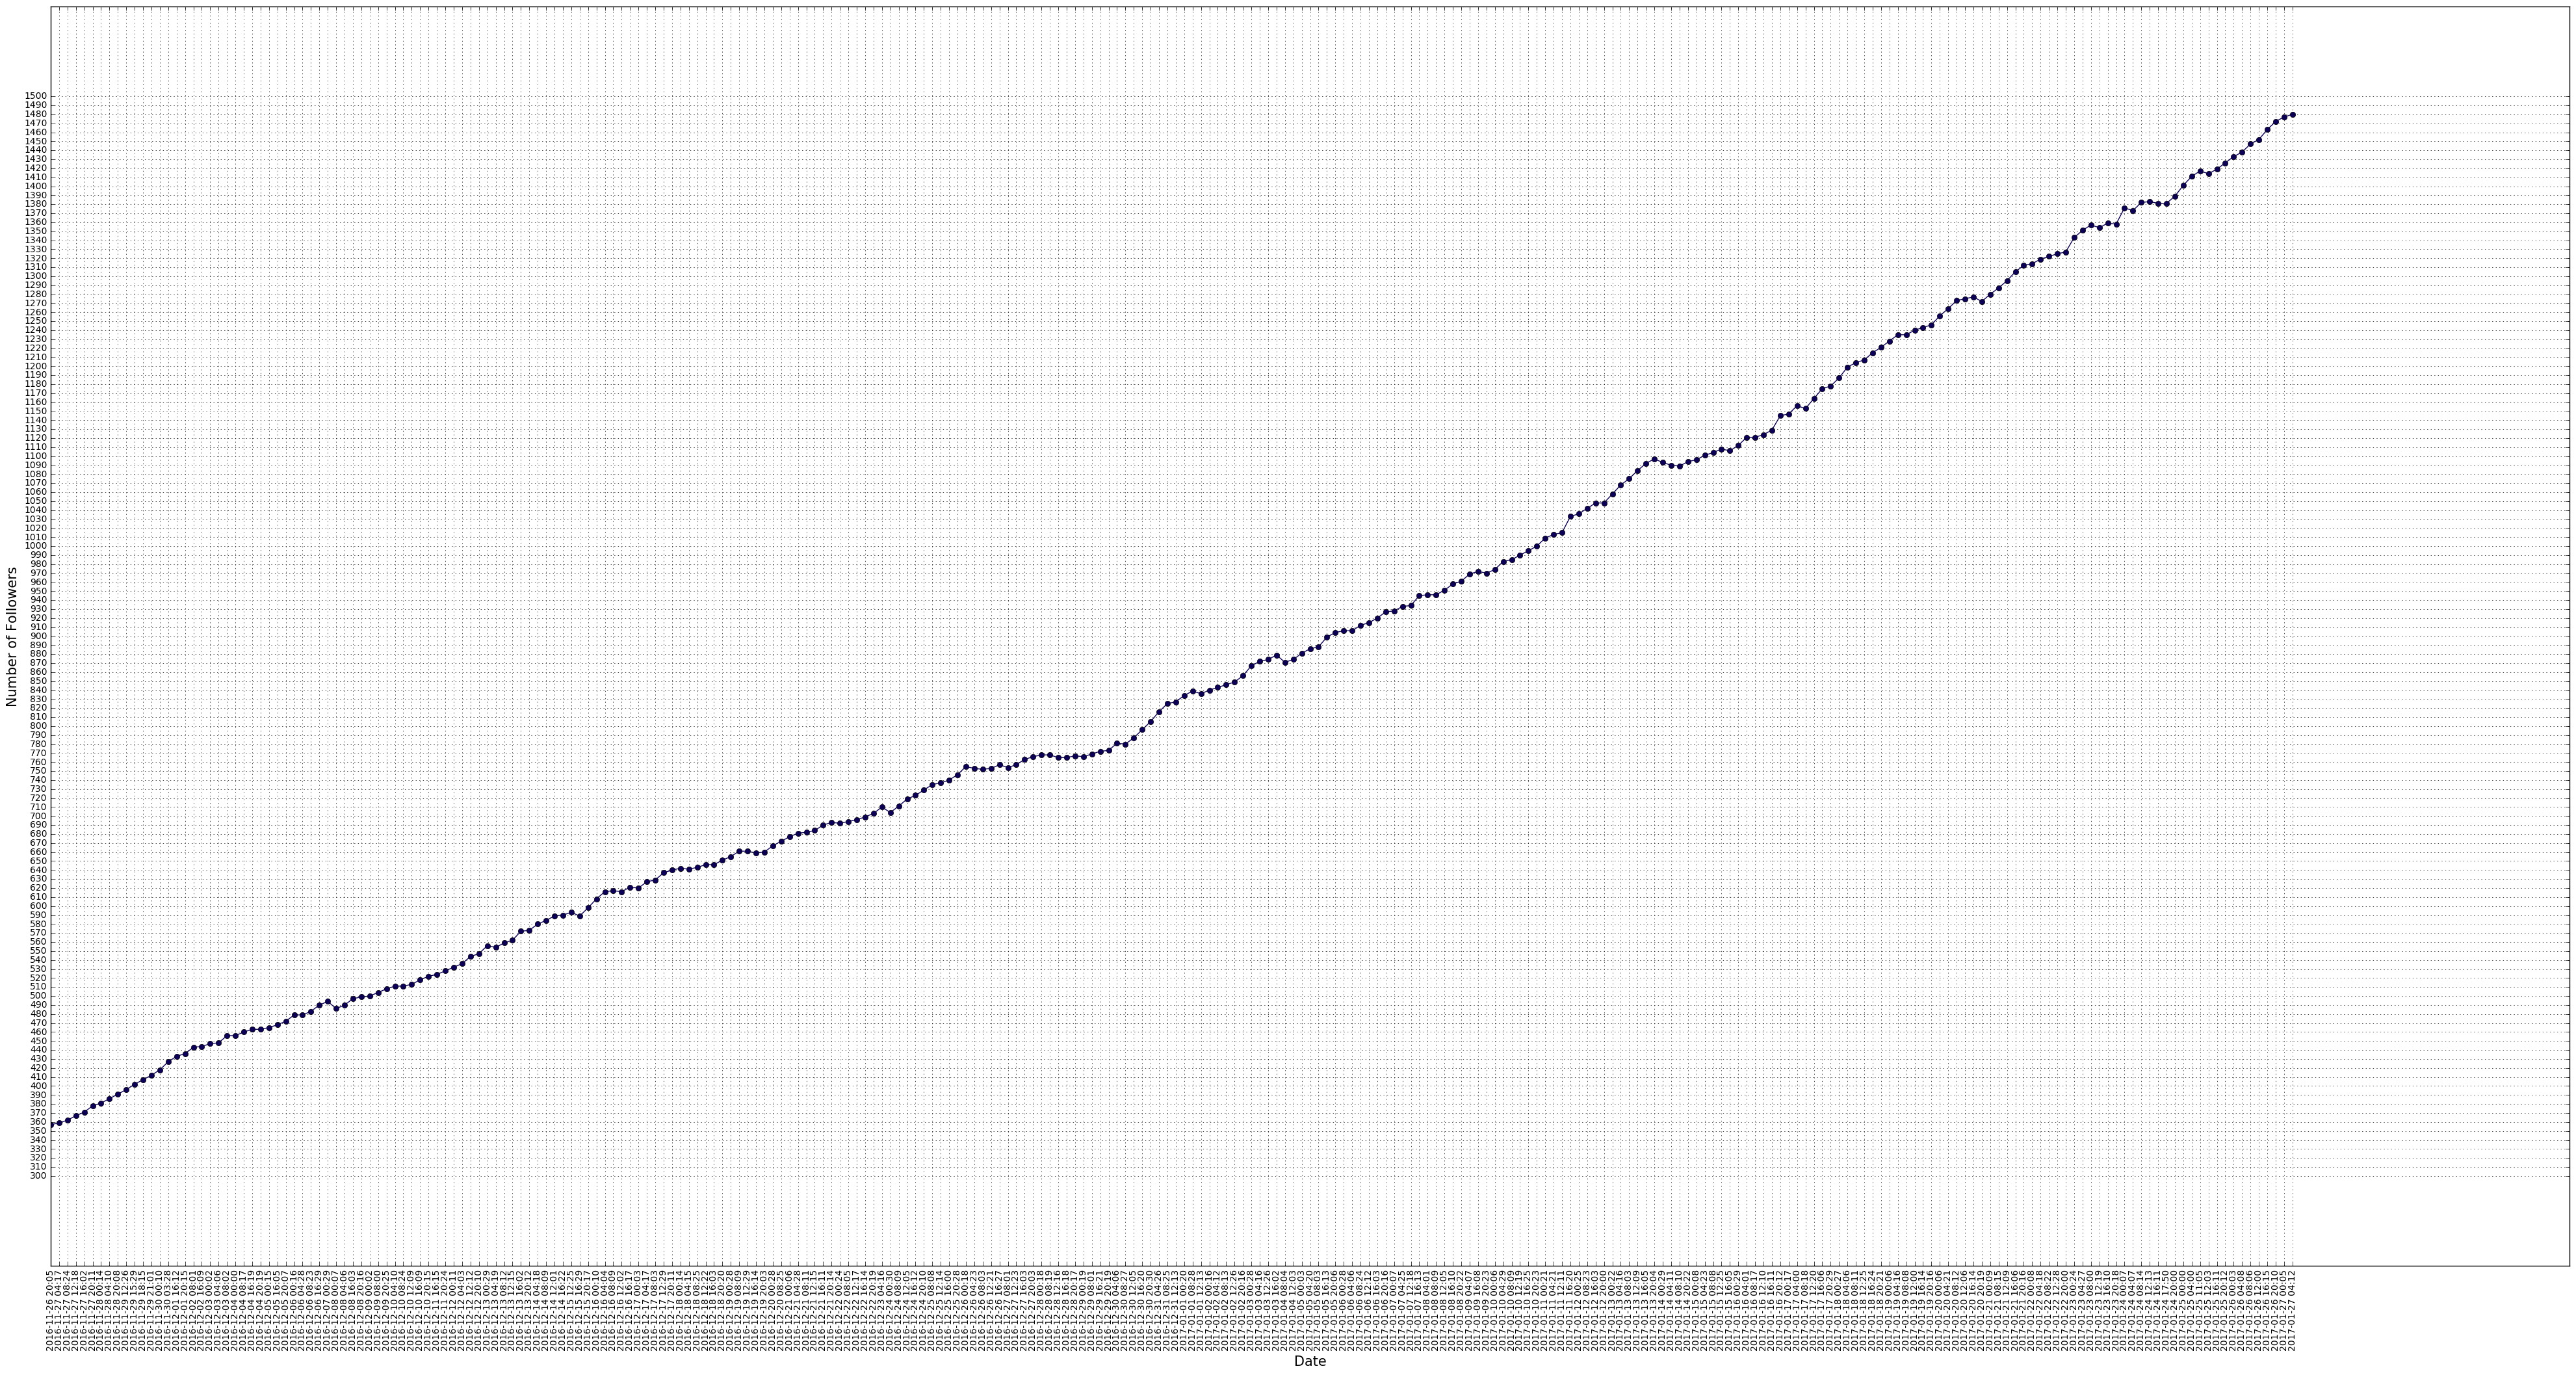

In [41]:
plt.figure(figsize=(50, 25))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Followers', fontsize=15)

#plot the line
plt.plot(range(len(dates)), followerNum, marker='o', color="#0c005c")

#get the lowerbound "rounded down to 100"
lowerbound = int(followerNum[0])
lowerbound -= int(followerNum[0]) % 100

#get the upperbound "rounded up to 100"
upperbound = int(followerNum[-1])
upperbound -= int(followerNum[-1]) % -100

plt.xticks(range(len(dates)), dates, rotation='vertical')
plt.yticks(range(lowerbound, upperbound + 1, 10))

plt.grid(True)
plt.show()

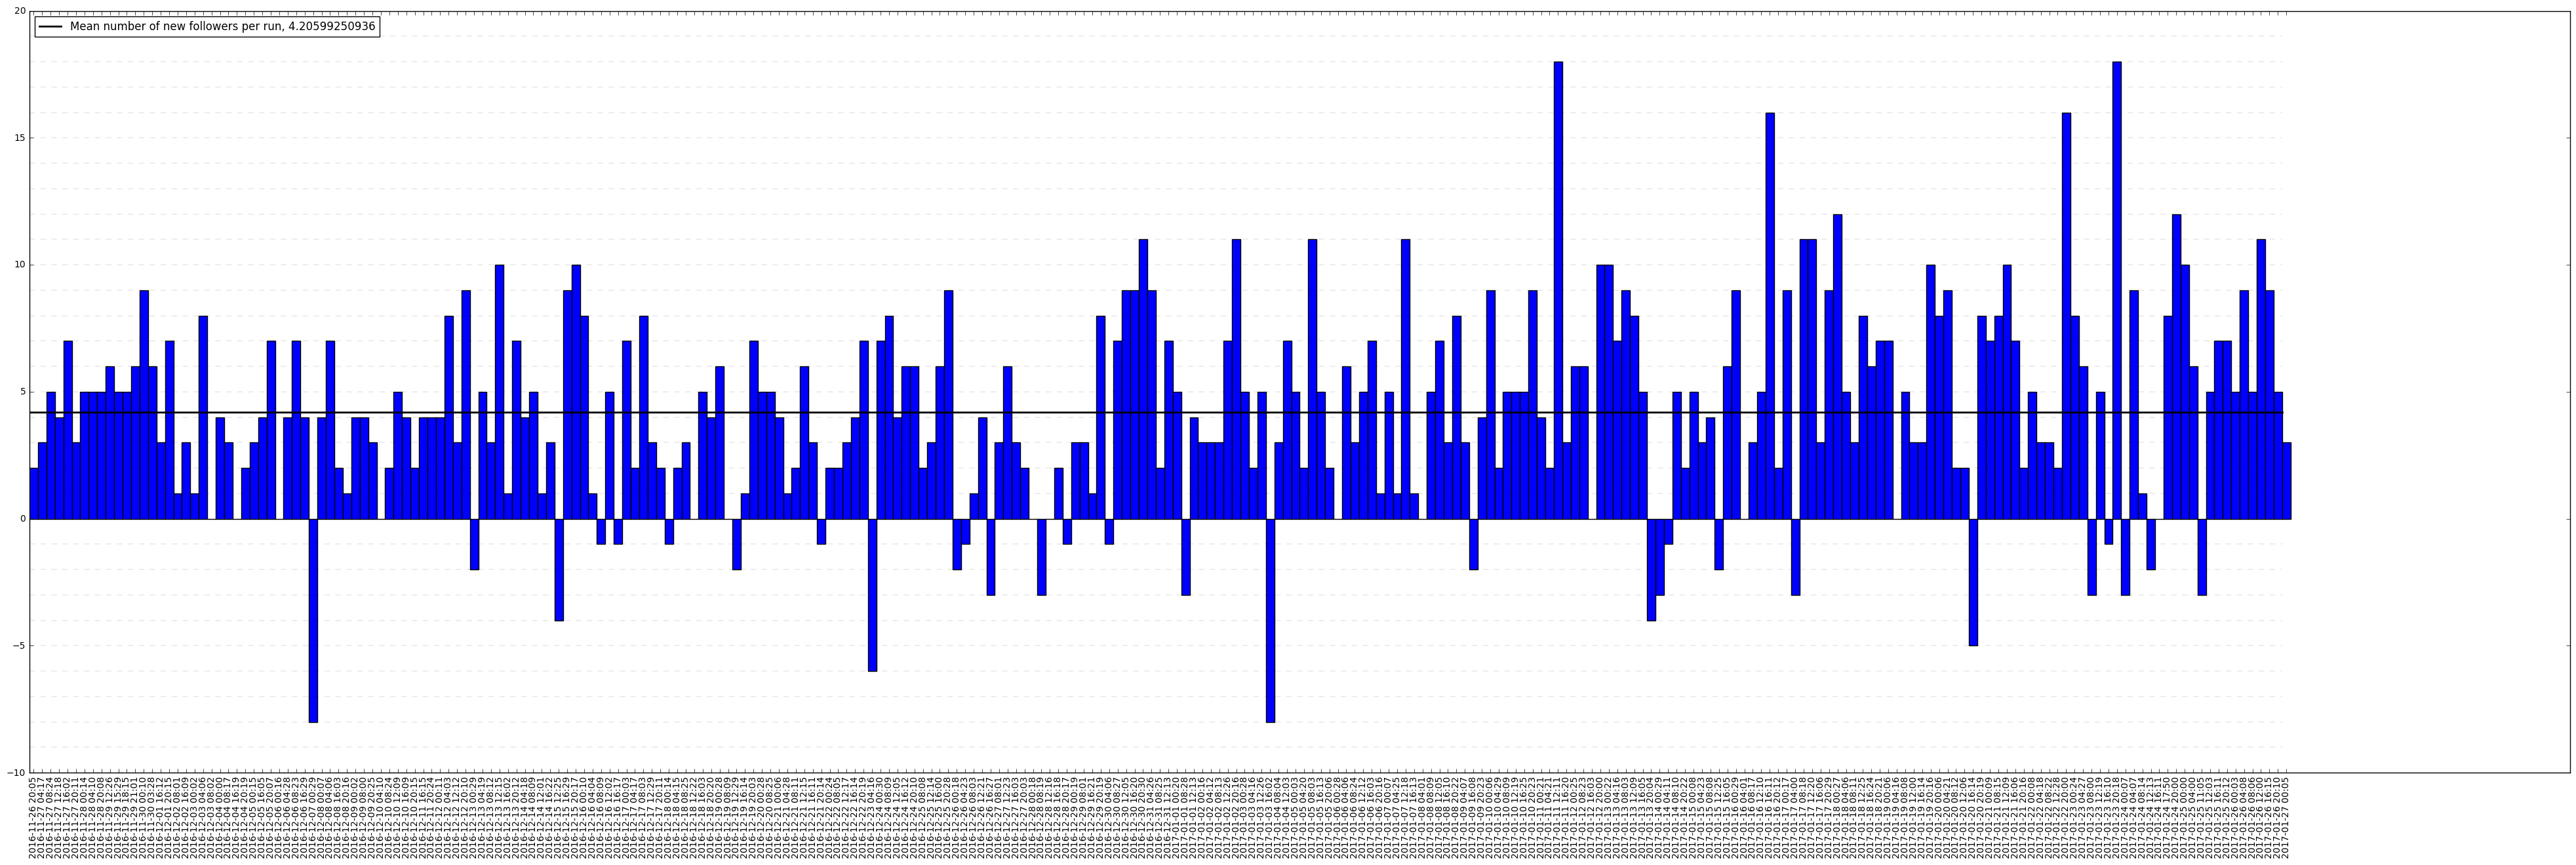

In [42]:
fig = plt.figure(figsize=(50, 15))
ax = fig.add_subplot(111)

diffs = []
for i in range(len(followerNum) - 1):
    diffs.append(followerNum[i + 1] - followerNum[i])

mean = np.mean(diffs)
index = np.arange(len(dates) - 1)

mean_line = np.empty(len(dates) - 1)
mean_line.fill(mean)
    
ax.bar(index, diffs, 1, color="blue")
ax.plot(index, mean_line, 'k-', linewidth="2", label="Mean number of new followers per run, " + str(mean))

for num in np.arange(np.min(diffs) - 2, np.max(diffs) + 2):
    line = np.empty(len(dates) - 1)
    line.fill(num)
    
    ax.plot(index, line, 'k--', linewidth="0.1")

ax.set_xticks(index + 0.5)
ax.set_xticklabels(dates, rotation="vertical")
plt.legend(loc=2,numpoints=1)

plt.show()

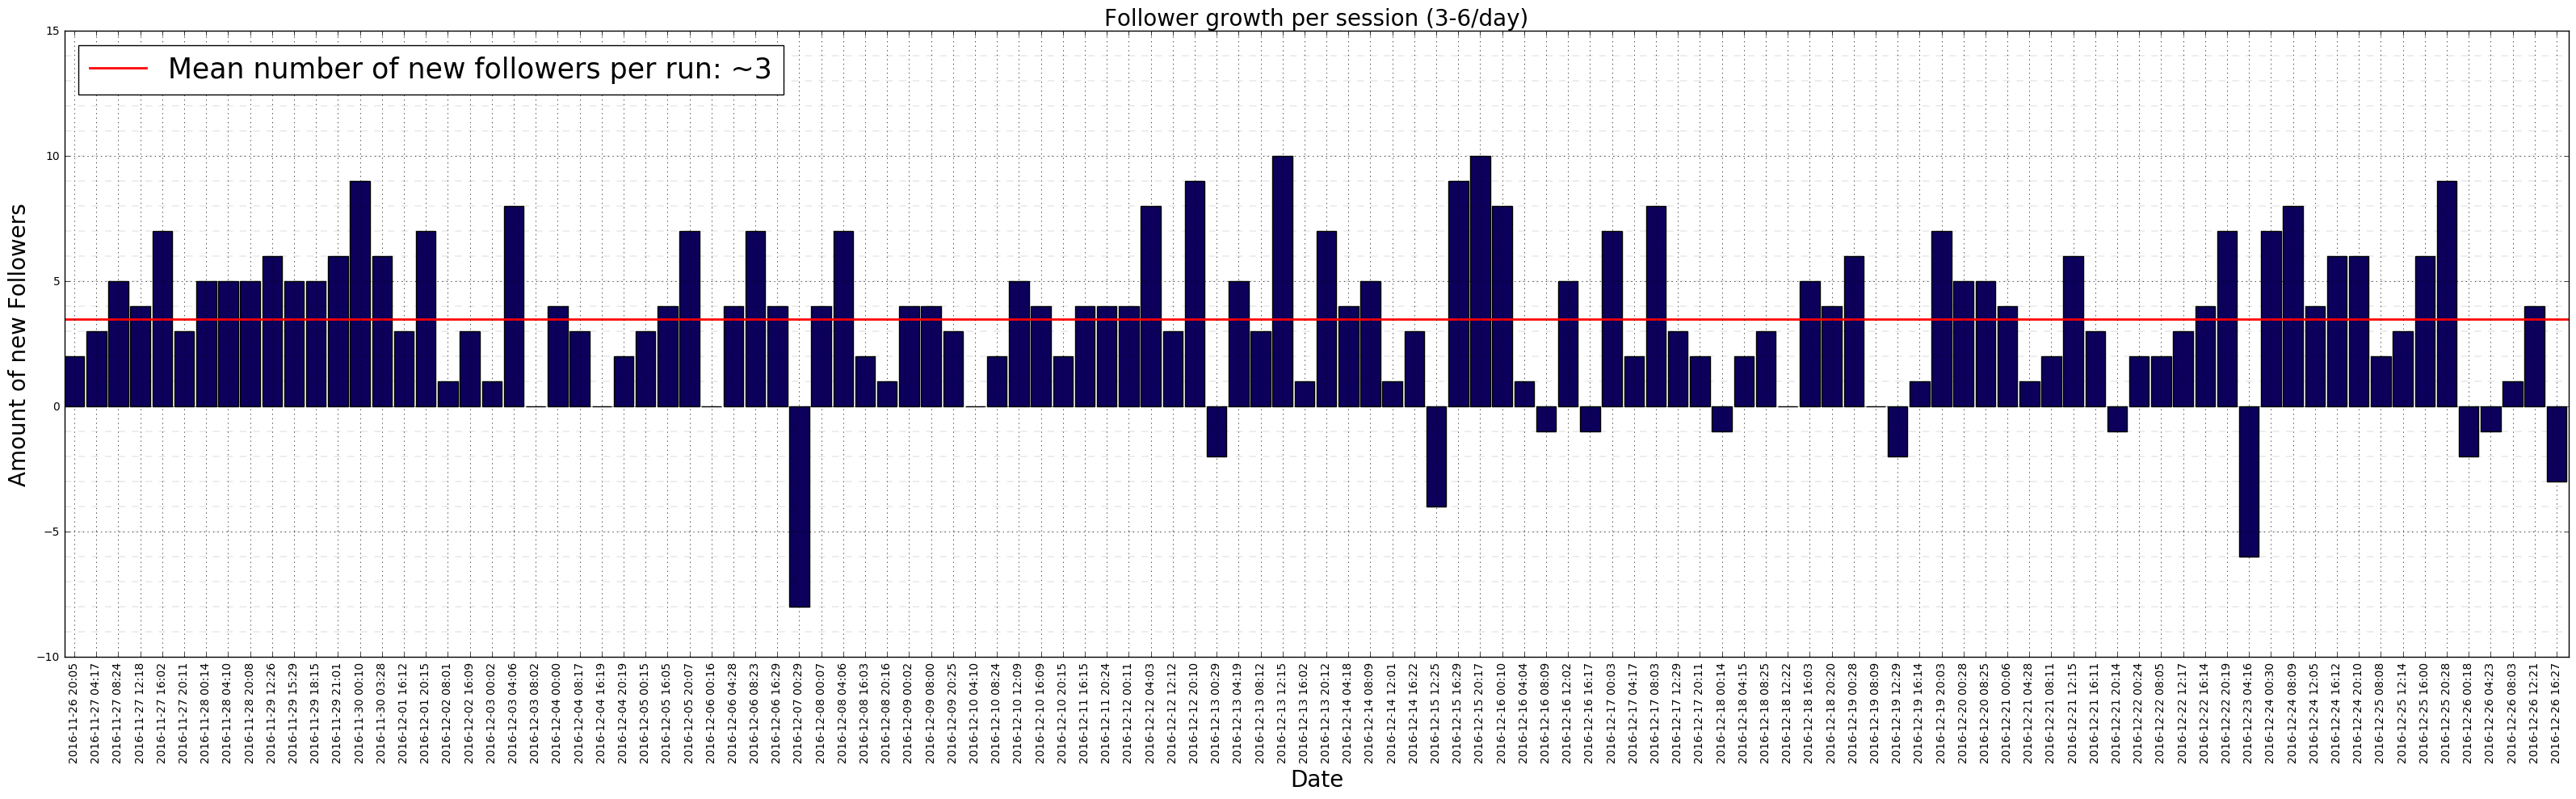

In [234]:
##################################################################################################################
#First month growth per session (3-6/day)
##################################################################################################################
f_m_diffs = [diff for diff, date in zip(diffs, dates) if date < '2016-12-27']
f_m_dates = dates[:len(f_m_diffs)]

f_m_diff_mean = np.mean(f_m_diffs)

fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(111)

plt.title('Follower growth per session (3-6/day)', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Amount of new Followers', fontsize=20)

f_m_diff_line = np.empty(len(f_m_dates) + 1)
f_m_diff_line.fill(f_m_diff_mean)
    
ax.plot(np.arange(len(f_m_dates) + 1), f_m_diff_line, 'r-', linewidth="2", label="Mean number of new followers per run: ~" + str(int(round(f_m_diff_mean))))
ax.bar(np.arange(len(f_m_dates)), f_m_diffs, 0.9, color="#0c005c")

for num in np.arange(np.min(f_m_diffs) - 1, np.max(f_m_diffs) + 5):
    line = np.empty(len(f_m_dates) + 5)
    line.fill(num)
    
    ax.plot(np.arange(len(f_m_dates) + 5), line, 'k--', linewidth='0.1')
    
ax.set_xticks(np.arange(len(f_m_dates)) + 0.45)
ax.set_xticklabels(f_m_dates, rotation="vertical")

plt.xlim(0, len(f_m_dates))

plt.grid()
plt.legend(loc=2,numpoints=1, fontsize=25)
plt.show()

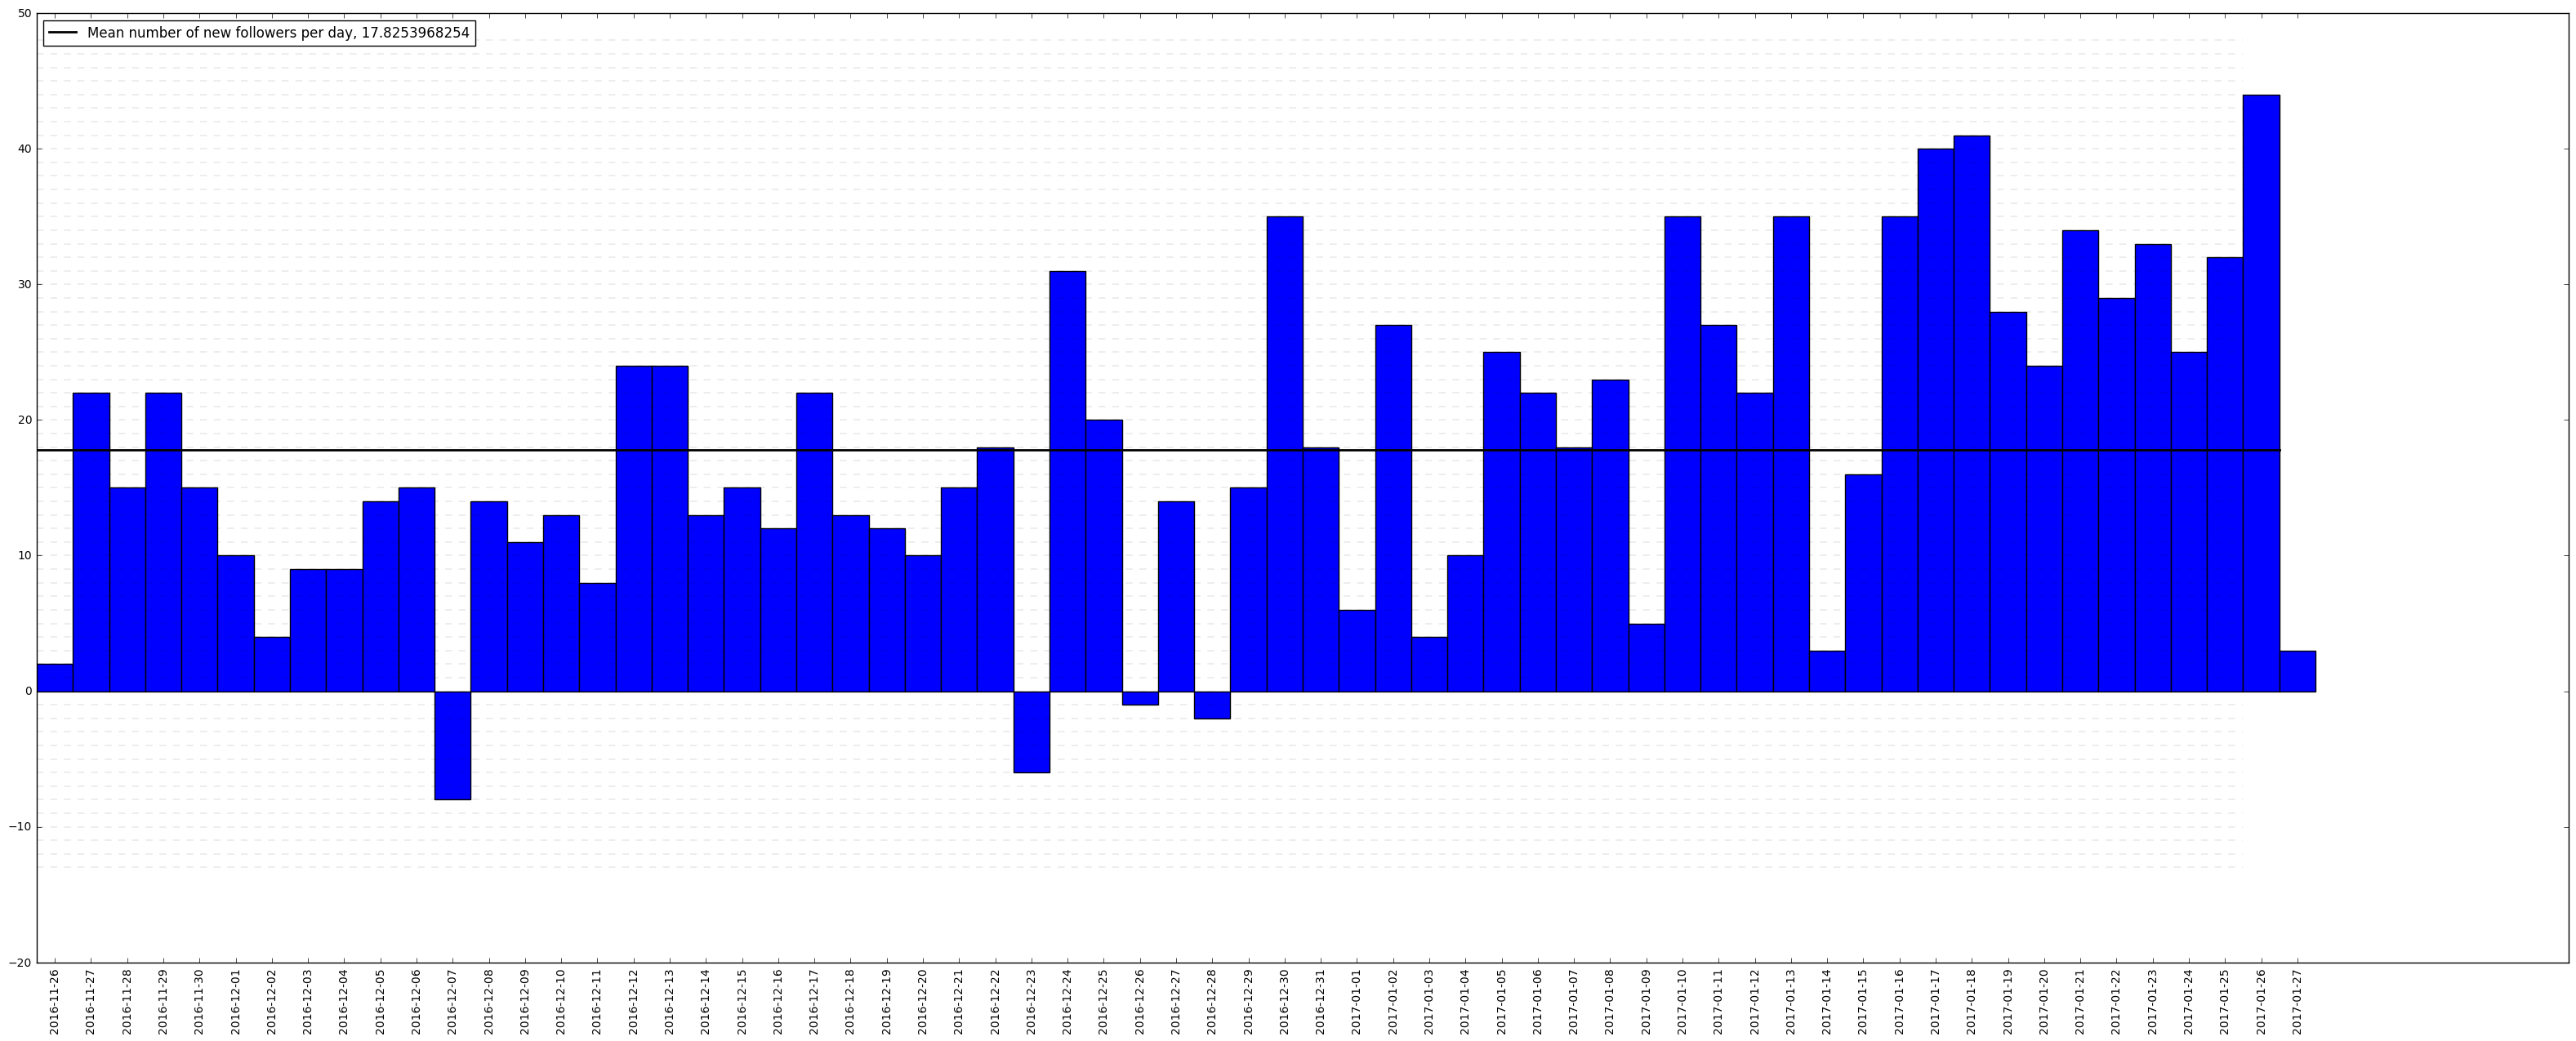

In [44]:
daily_grow = defaultdict(lambda: 0)

for pair in zip(diffs, dates):
    day = pair[1].split(' ')[0]
    daily_grow[day] = daily_grow[day] + pair[0]
    
daily_grow_sorted = sorted([pair for pair in daily_grow.items()], key=lambda x: x[0])

days = [pair[0] for pair in daily_grow_sorted]
growth = [pair[1] for pair in daily_grow_sorted]

mean_growth = np.mean(growth)

mean_growth_line = np.empty(len(days))
mean_growth_line.fill(mean_growth)

fig = plt.figure(figsize=(40, 15))
ax = fig.add_subplot(111)

for num in np.arange(np.min(growth) - 5, np.max(growth) + 5):
    line = np.empty(len(days) - 1)
    line.fill(num)
    
    ax.plot(np.arange(len(days) - 1), line, 'k--', linewidth="0.1")

ax.bar(np.arange(len(days)), growth, 1, color="blue")
ax.plot(np.arange(len(days)), mean_growth_line, 'k-', linewidth="2", label="Mean number of new followers per day, " + str(mean_growth))

ax.set_xticks(np.arange(len(days)) + 0.5)
ax.set_xticklabels(days, rotation="vertical")

plt.legend(loc=2,numpoints=1)
plt.show()

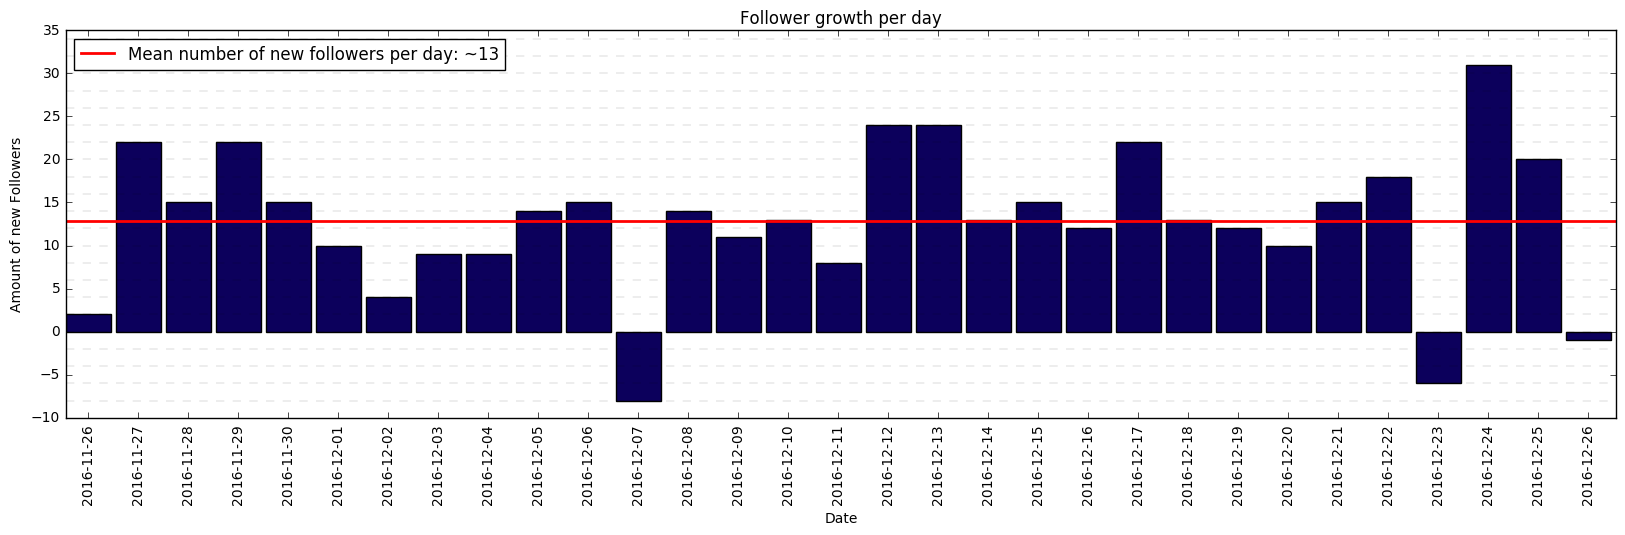

In [45]:
##################################################################################################################
#First month growth per day
##################################################################################################################

#getting data from first month
f_m_days = days[:31]
f_m_growth = growth[:31]

f_m_mean = np.mean(f_m_growth)
f_m_mean_line = np.empty(len(f_m_days) + 1)
f_m_mean_line.fill(f_m_mean)

#plotting the data
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

plt.title('Follower growth per day')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Amount of new Followers', fontsize=10)

#plotting the bars and the mean line
ax.bar(np.arange(len(f_m_days)), f_m_growth, 0.9, color="#0c005c")
ax.plot(np.arange(len(f_m_days) + 1), f_m_mean_line, 'r-', linewidth="2", label="Mean number of new followers per day: ~" + str(int(round(f_m_mean))))

ax.set_xticks(np.arange(len(f_m_days)) + 0.45)
ax.set_xticklabels(f_m_days, rotation='vertical')

#plotting only horizontal lines
for num in np.arange(np.min(f_m_growth), np.max(f_m_growth) + 4, 2):
    line = np.empty(len(f_m_days) + 1)
    line.fill(num)
    
    ax.plot(np.arange(len(f_m_days) + 1), line, 'k--', linewidth="0.1")

plt.legend(loc=2,numpoints=1)
plt.show()

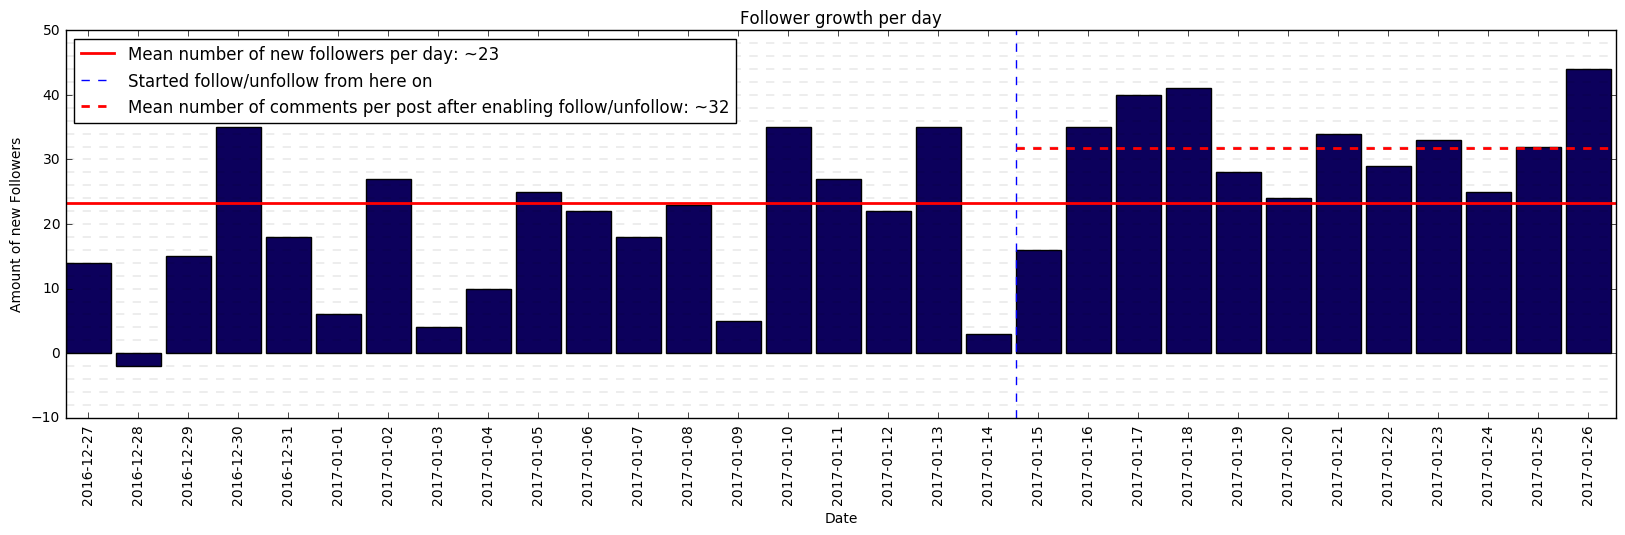

In [233]:
##################################################################################################################
#Second month growth per day
##################################################################################################################

#getting data from first month
s_m_days = days[31:62]
s_m_growth = growth[31:62]

f_m_mean = np.mean(s_m_growth)
f_m_mean_line = np.empty(len(s_m_days) + 1)
f_m_mean_line.fill(f_m_mean)

#plotting the data
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

plt.title('Follower growth per day')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Amount of new Followers', fontsize=10)

#plotting the bars and the mean line
ax.bar(np.arange(len(s_m_days)), s_m_growth, 0.9, color="#0c005c")
ax.plot(np.arange(len(s_m_days) + 1), f_m_mean_line, 'r-', linewidth="2", label="Mean number of new followers per day: ~" + str(int(round(f_m_mean))))

ax.set_xticks(np.arange(len(f_m_days)) + 0.45)
ax.set_xticklabels(s_m_days, rotation='vertical')

#plotting only horizontal lines
for num in np.arange(np.min(s_m_growth) - 6, np.max(s_m_growth) + 5, 2):
    line = np.empty(len(s_m_days) + 1)
    line.fill(num)
    
    ax.plot(np.arange(len(s_m_days) + 1), line, 'k--', linewidth="0.1")

plt.axvline(19, color='b', label='Started follow/unfollow from here on', linestyle='dashed')

after_follow = s_m_growth[19:]
after_follow_mean = np.mean(after_follow)

after_follow_mean_line = np.empty(len(after_follow) + 1)
after_follow_mean_line.fill(after_follow_mean)

ax.plot(np.arange(len(after_follow) + 1) + 19, after_follow_mean_line, 'r--', linewidth="2", label="Mean number of comments per post after enabling follow/unfollow: ~" + str(int(round(after_follow_mean))))
    
plt.legend(loc=2,numpoints=1)
plt.show()

In [204]:
pairs = {}

for pair in zip(followerNum, dates):
    if '-26' in pair[1]:
        pairs[pair[1].split(' ')[0]] = pair[0]
        
print 'Followernum in month: ' + str(pairs)

sorted_followerNum = sorted(pairs.values())

print 'Month 1 growth: ~' + str(int((sorted_followerNum[1] - sorted_followerNum[0]) / float(sorted_followerNum[0]) * 100)) + '%'
print 'Month 2 growth: ~' + str(int((sorted_followerNum[2] - sorted_followerNum[1]) / float(sorted_followerNum[1]) * 100)) + '%'

Followernum in month: {'2017-01-26': 1472, '2016-12-26': 757, '2016-11-26': 357}
Month 1 growth: ~112%
Month 2 growth: ~94%


In [47]:
##################################################################################################################
#Modifying the session data
##################################################################################################################

In [48]:
import re

def read_whole_file(logfile):
    whole_file = ''
    
    with open(logfile, 'r') as read_file:
        for line in read_file:
            if not line.startswith('[') and not '(' in line:
                whole_file += line
            
    return whole_file

whole_file = read_whole_file('logFile.txt')



session_start = 'started - (20[\d]{2}-[\d]{2}-[\d]{2} [\d]{2}:[\d]{2}:[\d]{2})'

tags = 'Tag (\[\d\/\d\]--> \w+)'

liked = '\nLiked: (\d+)\n'
already_liked = 'Already Liked: (\d+)\n'
commented = 'Commented: (\d+)'
followed = 'Followed: (\d+)'
inapp = 'Inappropriate: (\d+)'

In [49]:
tag_pattern = '\[(\d)\/(\d)\]--> (\w+)'

def group_tags(tags):
    tag_groups = []
    tag_finder = re.compile(tag_pattern)
    
    current_tags = []
    for tag in tags:
        result = tag_finder.findall(tag)[0]
        current_tags.append(result[2])
        
        if result[0] == result[1]:
            tag_groups.append(current_tags)
            current_tags = []
            
    out_groups = []
    temp_group =[]
    for group in tag_groups:
        if len(group) > 1:
            out_groups.append(group)
            continue
            
        temp_group.append(group[0])
        
        if len(temp_group) == 3:
            out_groups.append(temp_group)
            temp_group = []
    
    return out_groups

In [50]:
def group_info(infos):
    info_group = []
    
    temp = 0
    for index, info in enumerate(infos):
        if index > 0 and index % 3 == 0:
            info_group.append(temp)
            temp = 0
        
        temp += int(info)
            
    info_group.append(temp)
    
    return info_group

In [51]:
sessions = re.compile(session_start)
tag = re.compile(tags)
likes = re.compile(liked)
already_likes = re.compile(already_liked)
comments = re.compile(commented)
inapps = re.compile(inapp)
followed = re.compile(followed)

all_sessions = sessions.findall(whole_file)
grouped_tags = group_tags(tag.findall(whole_file))
grouped_likes = likes.findall(whole_file)[:85] + group_info(likes.findall(whole_file)[85:])
grouped_already_likes = already_likes.findall(whole_file)[:85] + group_info(already_likes.findall(whole_file)[85:])
grouped_comments = comments.findall(whole_file)[:85] + group_info(comments.findall(whole_file)[85:])
grouped_inapps = inapps.findall(whole_file)[:85] + group_info(inapps.findall(whole_file)[85:])
group_followed = followed.findall(whole_file)[:85] + group_info(followed.findall(whole_file)[85:])

session_info = [ { 'session': session, 'tags': tags, 'liked': liked, 'already_liked': already, 'commented': commented,
                          'inapps': inapps,'followed': followed }
                for session, tags, liked, already, commented, inapps, followed 
                in zip(all_sessions, grouped_tags, grouped_likes, grouped_already_likes,
                       grouped_comments, grouped_inapps, group_followed) ]

In [52]:
print session_info[0]

{'liked': '418', 'followed': '0', 'tags': ['vegan', 'veganfoodshare', 'veganism'], 'session': '2016-12-12 12:11:51', 'already_liked': '74', 'commented': '51', 'inapps': '31'}
